# Processing Notebook

Run this notebook to process your anndata. You only need to modify the arguments in the first block. When you are done, simple press shift+enter to run the code block.

In [1]:
#input anndata filename
input_file_path = 'data/adata_small_test.h5ad'
#output anndata filename
output_file_path = 'data/adata_small_output.h5ad'

min_genes=200
min_counts=2500
n_neighbors=25
n_pcs=20
cluster_resolution=5

reading data in
AnnData object with n_obs × n_vars = 1019 × 20138 
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation'
    var: 'n_cells'
pre-processing
AnnData object with n_obs × n_vars = 1019 × 20138 
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'n_counts'
    var: 'n_cells'
normalization & scaling


/opt/conda/envs/tabula_sapiens/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:1225: RuntimeWarning: divide by zero encountered in true_divide
  sparsefuncs.inplace_column_scale(X, 1/scale)


pca


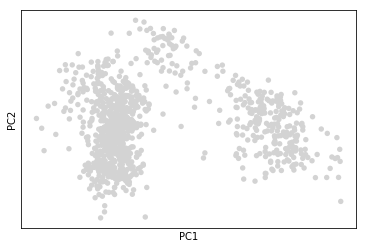

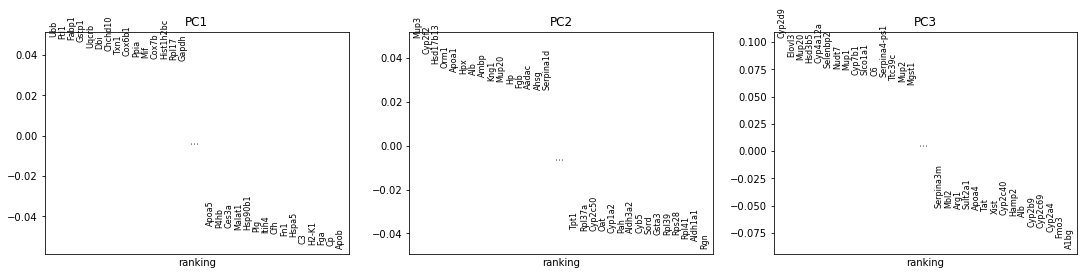

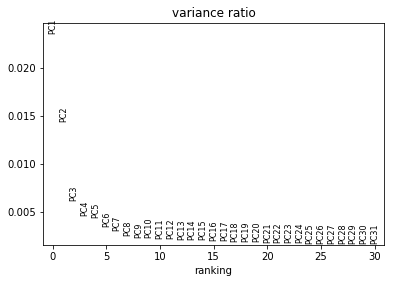

neighs
umap computing
clustering
save h5ad and launch cellxgene


In [2]:
import scanpy as sc
print('reading data in')
adata = sc.read_h5ad(input_file_path)
print(adata)

print('pre-processing')
sc.pp.filter_cells(adata, min_genes=min_genes)
sc.pp.filter_cells(adata, min_counts=min_counts)

print(adata)

print('normalization & scaling')
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
adata_nonans = sc.pp.filter_genes_dispersion(
    adata, subset=False, min_disp=.5, max_disp=None,
    min_mean=.0125, max_mean=10, n_bins=20, n_top_genes=None,
    log=True, copy=True)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10, zero_center=False)

# print('pre-processing visualizations')  # optional step
# sc.pl.violin(
#     adata_nonans, [
#         'n_genes', 'n_counts'], jitter=0.4, multi_panel=True)
# sc.pl.scatter(adata_nonans, x='n_counts', y='n_genes')

# sc.pl.violin(adata_nonans, ['n_counts', 'n_genes'],
#              groupby='tissue', size=2, log=True)
adata.raw = adata

print('pca')
sc.tl.pca(adata)
# # optional
sc.pl.pca_overview(adata)

print('neighs')
sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)

print('umap computing')
sc.tl.umap(adata, n_components=2)

print('clustering')
sc.tl.louvain(adata, resolution=cluster_resolution)
sc.tl.leiden(adata, resolution=cluster_resolution)

print('save h5ad and launch cellxgene')
adata.write(output_file_path)
